In [3]:
import torch
import esm
import sys
sys.path.append("../../preprocessing")
from preprocessing.protein import build_local_protein_hypergraph

/Users/simon/Documents/git/paper/hyperdti/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()

In [8]:
sequence = "MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK"


In [9]:
# --- Sequenz und Batch-Converter -------------------------------
batch_converter = alphabet.get_batch_converter()
_, _, batch_tokens = batch_converter([("P00918", sequence)])

# --- Kontaktvorhersage -----------------------------------------
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=True)
contact_map = results["contacts"][0]

Some weights of the model checkpoint at Rostlab/prot_bert_bfd were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/simon/Documents/git/paper/hyperdti/preprocessing/protein.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(ids['input_ids'

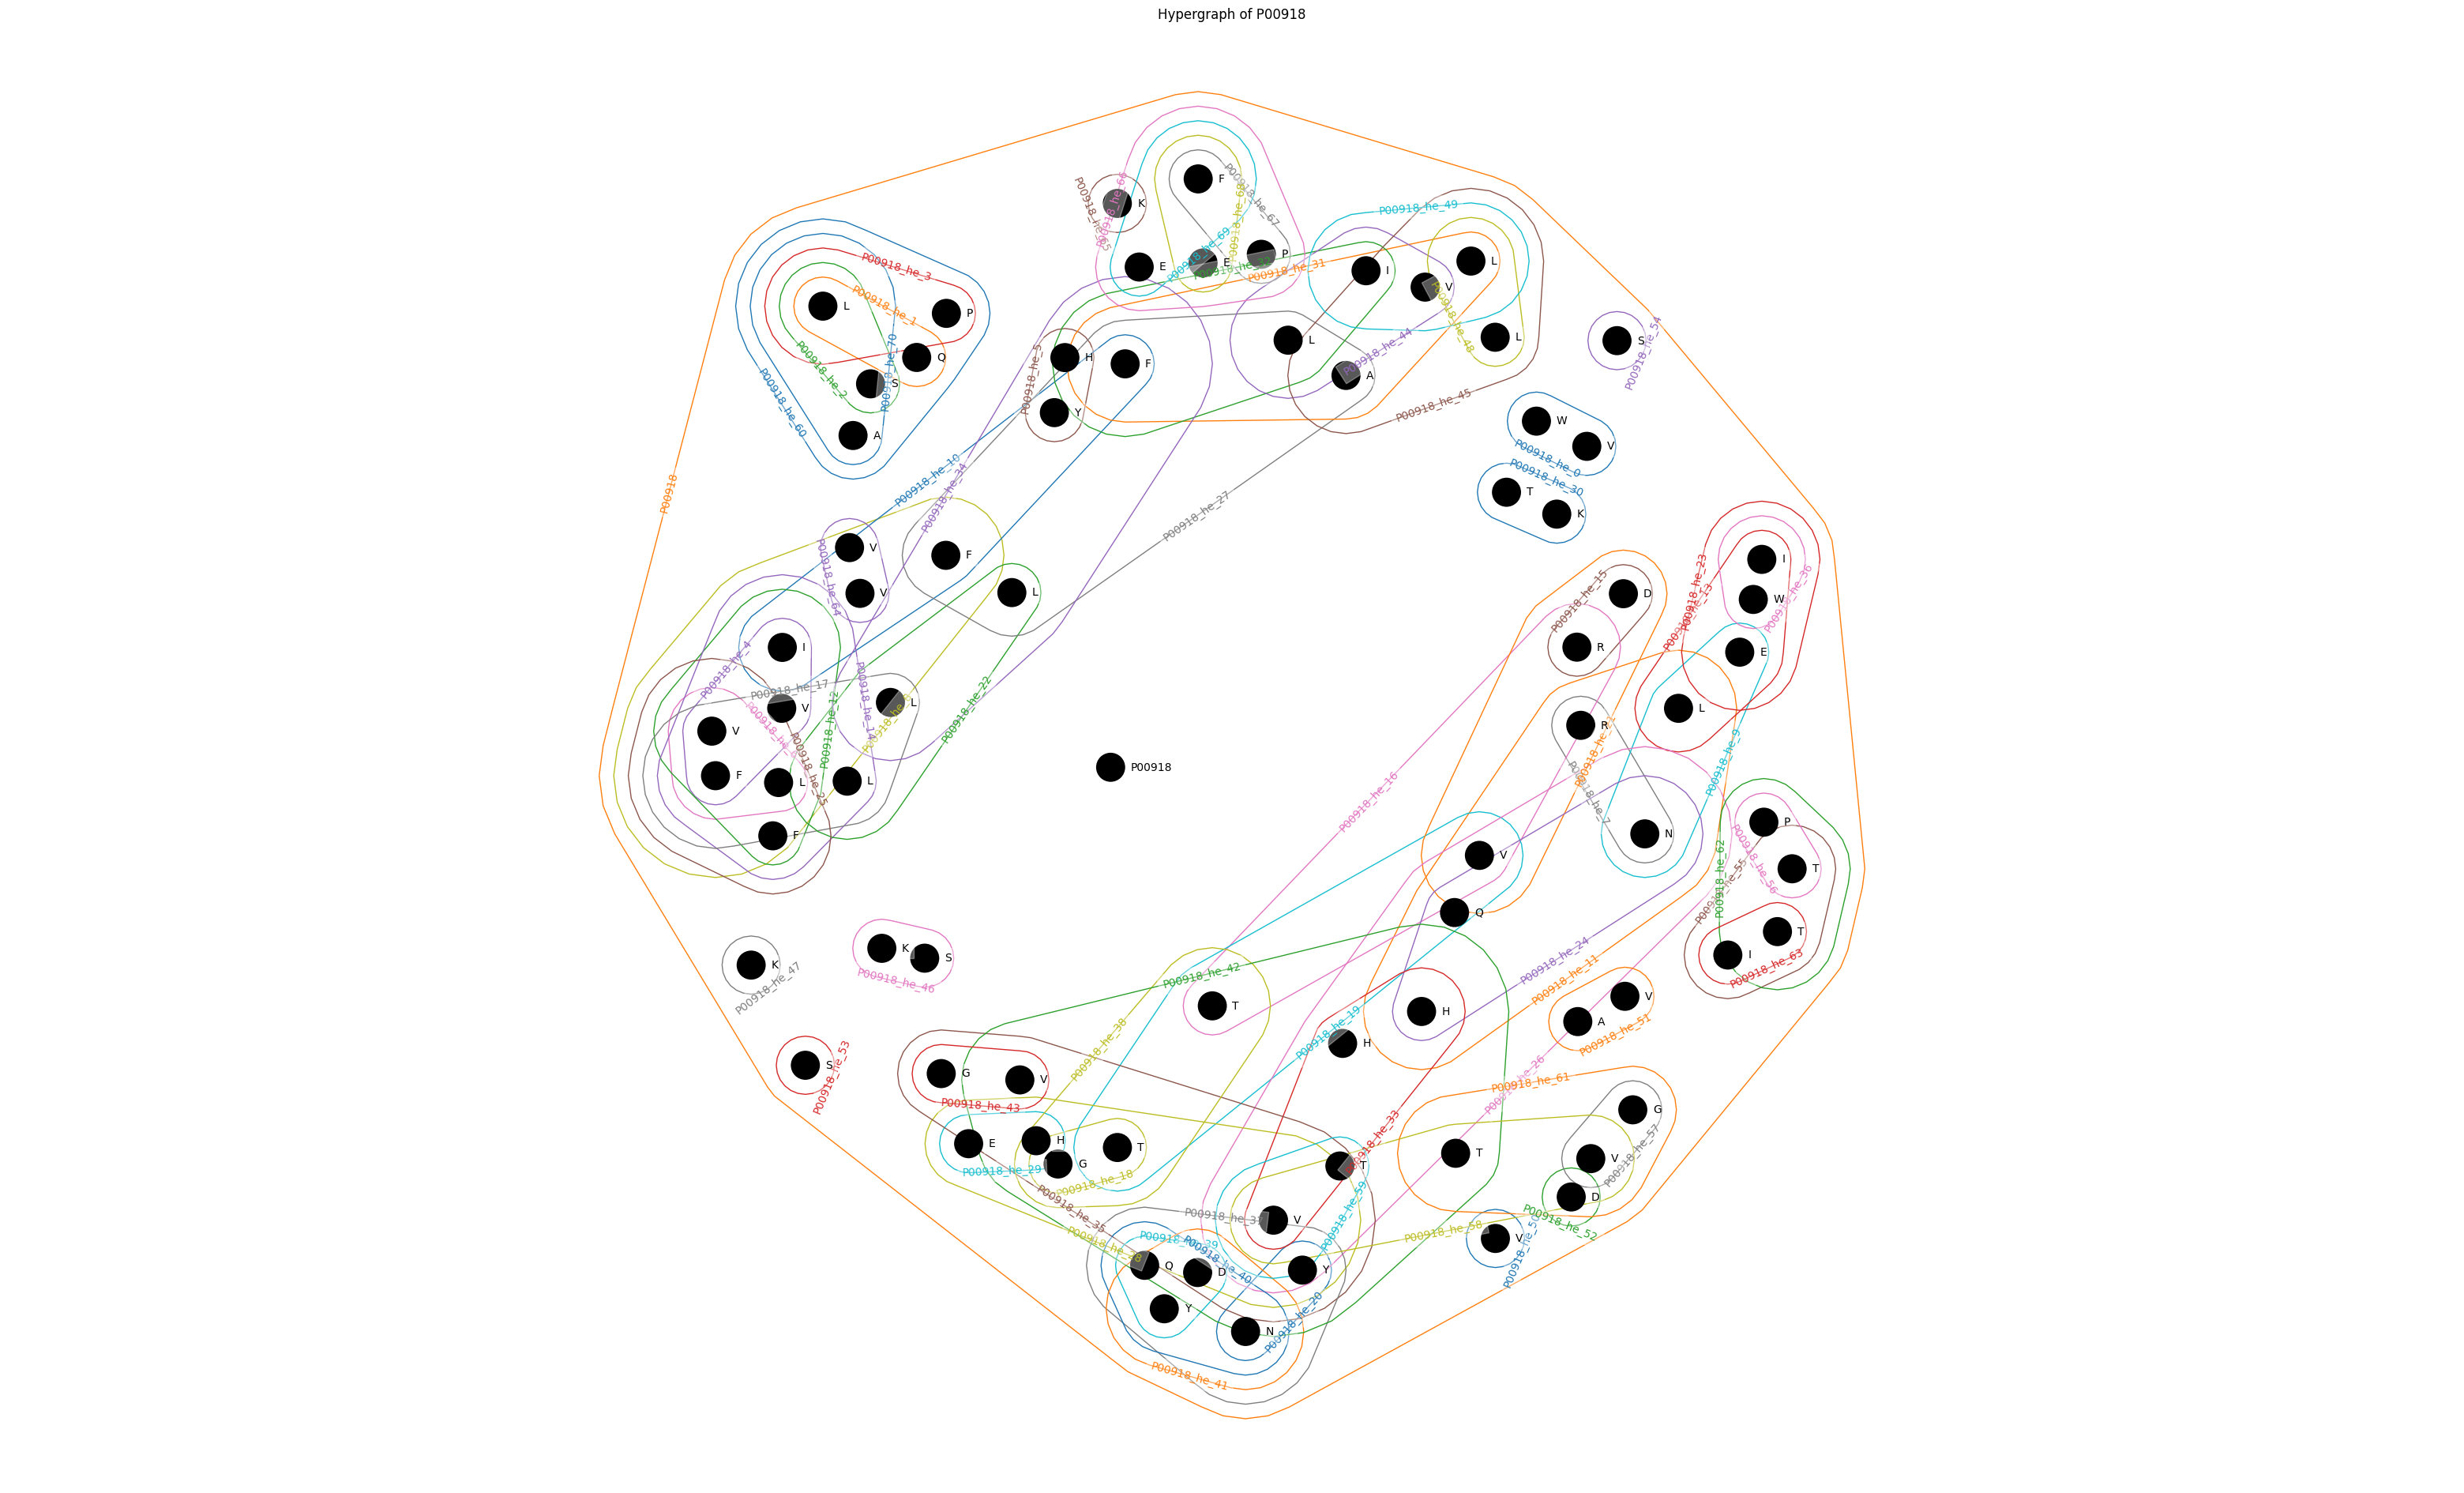

({'P00918_he_0': (1, 5),
  'P00918_he_1': (2, 65),
  'P00918_he_2': (3, 65),
  'P00918_he_3': (4, 65),
  'P00918_he_4': (6, 10, 14, 16),
  'P00918_he_5': (7, 39),
  'P00918_he_6': (8, 14, 16),
  'P00918_he_7': (9, 13),
  'P00918_he_8': (6, 10, 12, 14, 16),
  'P00918_he_9': (11, 13, 15),
  'P00918_he_10': (10, 12, 29),
  'P00918_he_11': (9, 11, 13, 26, 28),
  'P00918_he_12': (6, 8, 10, 14, 27),
  'P00918_he_13': (11, 15, 25),
  'P00918_he_14': (6, 8, 10, 16, 19, 27),
  'P00918_he_15': (17, 23),
  'P00918_he_16': (18, 21, 23),
  'P00918_he_17': (16, 19, 24),
  'P00918_he_18': (20, 42),
  'P00918_he_19': (18, 21, 42),
  'P00918_he_20': (22, 41),
  'P00918_he_21': (17, 18, 23),
  'P00918_he_22': (19, 24, 37),
  'P00918_he_23': (15, 25, 40),
  'P00918_he_24': (13, 26, 28),
  'P00918_he_25': (14, 16, 27),
  'P00918_he_26': (13, 26, 28, 36, 46),
  'P00918_he_27': (12, 29, 34, 35, 37),
  'P00918_he_28': (30, 31, 46),
  'P00918_he_29': (30, 31),
  'P00918_he_30': (32, 33),
  'P00918_he_31': (29

In [10]:
build_local_protein_hypergraph(contact_map, sequence, trade_name="P00918", plot=True)